## Question 1: Create Datasets

In [84]:
import numpy as np

In [85]:
n_dataset = 15
n_class = 10
n_class_size = 20

In [91]:
def checkSampleVariance():
  population = np.random.randint(1,100,200)
  for i in range(n_class):
    pop_class = population[n_class*i:n_class*(i + 1)]
    print(f'class {i}:')
    print(f'mean : {np.mean(pop_class)}')
    print(f'variance : {np.var(pop_class)}')
  print(f'Population mean : {np.mean(population)}')
  print(f'Population variance : {np.var(population)}')



In [92]:
for i in range(n_dataset):
  print(f"DATA SET {i + 1} : ")
  checkSampleVariance()

DATA SET 1 : 
class 0:
mean : 44.6
variance : 635.04
class 1:
mean : 65.2
variance : 441.75999999999993
class 2:
mean : 44.3
variance : 512.01
class 3:
mean : 43.5
variance : 979.45
class 4:
mean : 59.0
variance : 848.8
class 5:
mean : 72.3
variance : 363.81000000000006
class 6:
mean : 52.5
variance : 413.85
class 7:
mean : 52.5
variance : 1472.05
class 8:
mean : 58.9
variance : 513.49
class 9:
mean : 49.8
variance : 1081.96
Population mean : 53.34
Population variance : 805.6444
DATA SET 2 : 
class 0:
mean : 51.4
variance : 989.04
class 1:
mean : 58.3
variance : 499.01000000000005
class 2:
mean : 48.2
variance : 689.56
class 3:
mean : 54.9
variance : 994.49
class 4:
mean : 40.0
variance : 704.0
class 5:
mean : 46.5
variance : 976.85
class 6:
mean : 57.8
variance : 852.9600000000003
class 7:
mean : 40.6
variance : 897.04
class 8:
mean : 38.8
variance : 807.1600000000001
class 9:
mean : 50.9
variance : 731.49
Population mean : 48.935
Population variance : 819.380775
DATA SET 3 : 
class 0

## Question 2: Implementing Box-Muller Transformation algorithm

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def gaussianTransform(x, y):
  x_new = np.sqrt(-2*np.log(x))*np.cos(2*np.pi*y)
  y_new = np.sqrt(-2*np.log(x))*np.sin(2*np.pi*y)

  return x_new, y_new

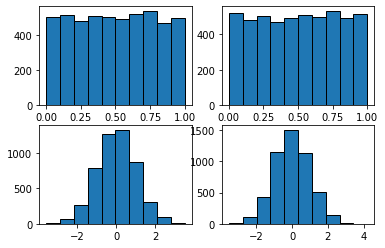

In [16]:
x_u = np.random.rand(5000)
y_u = np.random.rand(5000)

x_g, y_g = gaussianTransform(x_u, y_u)

fig = plt.figure()

plt.subplot(2, 2, 1)
plt.hist(x_u, ec='black')

plt.subplot(2, 2, 2)
plt.hist(y_u, ec='black')

plt.subplot(2, 2, 3)
plt.hist(x_g, ec='black')

plt.subplot(2, 2, 4)
plt.hist(y_g, ec='black')

plt.show()


## Question 3: Scrap Hotel Data

The below code is for India and can be extended to other countries by adding an outer loop given in the last part. The below codes takes several minutes to run.

In [ ]:
hotelname_list = []
city_list = []
countries_list = []
rating_list = []
prince_list = []
Amenities_list = []
HotelDescription_list = []
Review1_list = []
Review2_list = []

hotel_name = ""
city_name = ""
country_name = ""
ratingl = ""
pricel = ""
amenities = ""
descriptionl = ""
review1l = ""
review2l = ""

url = 'https://www.goibibo.com/destinations/all-states-in-india/'
data = requests.get(url)
html = data.text
soup = BeautifulSoup(html, 'html.parser')
cards = soup.find_all('div', {'class' : 'col-md-4 col-sm-4 col-xs-12 filtr-item posrel'})
state_urls = []
state_names = []
for card in cards :
	for a in card.find_all('a', href=True):
		if a.text.rstrip():
			state_urls.append(a['href'])
			state_names.append(a.text.rstrip())
length = len(state_urls)
for i in range(length):
  url = state_urls[i]
  country_name = 'India'
  data = requests.get(url)
  html = data.text
  soup = BeautifulSoup(html, 'html.parser')
  places_to_visit = soup.find('div', {'class' : 'place-to-visit-container'})
  if(places_to_visit):
    card = places_to_visit.find('div', {'class' : 'col-md-12'})
    city_urls = {}
    for a in card.find_all('a', href=True):
      if a['href']:
        list = a['href'].split('/')
        city_urls[list[4]] = 'https://www.goibibo.com/hotels/hotels-in-' + list[4] + '-ct/'

    for city in city_urls:
      print(f'Extracting for city : {city}')
      city_name = city
      url = city_urls[city]
      response = requests.get(url)
      data = BeautifulSoup(response.text, 'html.parser')
      cards_price_data = data.find_all('p', attrs={'class', 'HotelCardstyles__CurrentPrice-sc-1s80tyk-27 czKsrL'})
      cards_url_data = data.find_all('div', attrs={'class', 'HotelCardstyles__HotelNameWrapperDiv-sc-1s80tyk-11 hiiHjq'})
      hotel_price = {}
      hotel_url = {}
      for i in range(0, len(cards_price_data)):
        hotel_price[cards_url_data[i].text.rstrip()] = cards_price_data[i].text.rstrip()
        hotel_url[cards_url_data[i].text.rstrip()] = 'https://www.goibibo.com' + cards_url_data[i].find('a', href = True)['href']
      for i in range(0, len(cards_price_data)):
        url = hotel_url[cards_url_data[i].text.rstrip()]
        data = requests.get(url)
        html = data.text
        hotel_name = cards_url_data[i].text.rstrip()
        pricel = hotel_price[cards_url_data[i].text.rstrip()]
        # print('Extracting for hotel : ' + cards_url_data[i].text.rstrip())
        soup = BeautifulSoup(html, 'html.parser')
        div = soup.find('div', { 'id': 'root' })
        description = div.find('section', {'class' : 'HotelDetailsMain__HotelDetailsContainer-sc-2p7gdu-0 kpmitu'})
        descriptiont = description.find('span', {'itemprop' : 'streetAddress'})
        if descriptiont:
          address = descriptiont.text.rstrip().replace(' View on Map', '')
        descriptionl = address

        rating = 'Rating not found'
        ratingdata = description.find('span', {'itemprop' : 'ratingValue'}) #contains rating
        if ratingdata:
          rating = ratingdata.text.rstrip()
        ratingl = rating

        review1 = 'Review not found'
        review2 = 'Review not found'
        reviews = div.find_all('span', {'class' : 'UserReviewstyles__UserReviewTextStyle-sc-1y05l7z-4 dTkBBw'})
        
        if(len(reviews) > 1):
          review1 = reviews[0].text.rstrip()
        if(len(reviews) > 3):
          review2 = reviews[3].text.rstrip()
        review1l = review1
        review2l = review2

        amenities_list = []  #contains all the amenities.
        amenitiesdiv = div.find('div', {'class' : 'Amenitiesstyles__AmenitiesListBlock-sc-10opy4a-4 cMbIgg'})
        if amenitiesdiv:
          for amenity in amenitiesdiv.find_all('span', {'class':'Amenitiesstyles__AmenityItemText-sc-10opy4a-8 iwRmcg'}) :
            if amenity:
              amenities_list.append(amenity.text.rstrip())
            else:
              amenities_list.append('Amenity Not Found')
        amenities = amenities_list
        hotelname_list.append(hotel_name)
        city_list.append(city_name)
        countries_list.append(country_name)
        rating_list.append(ratingl)
        prince_list.append(pricel)
        Amenities_list.append(amenities)
        HotelDescription_list.append(descriptionl)
        Review1_list.append(review1l)
        Review2_list.append(review2l)
      
      print(f'Extracted {len(cards_price_data)} hotels at {city} successfully')
dict = {'Hotel_Name': hotelname_list, 'City_Name': city_list, 'country_name': countries_list,
				'Rating' : rating_list, 'Price/Night' : prince_list, 'Amenities' : Amenities_list,
				'Description' : HotelDescription_list, 'Review1' : Review1_list, 'Review2' : Review2_list}
df = pd.DataFrame(dict)
df.to_csv('hotels.csv')

To extract for all the countries, we need to use the below code in the outer loop

In [101]:
import requests
import pandas as pd  
from bs4 import BeautifulSoup

hotelname_list = []
city_list = []
countries_list = []
rating_list = []
prince_list = []
Amenities_list = []
HotelDescription_list = []
Review1_list = []
Review2_list = []

hotel_name = ""
city_name = ""
country_name = ""
ratingl = ""
pricel = ""
amenities = ""
descriptionl = ""
review1l = ""
review2l = ""

url = 'https://www.goibibo.com/destinations/intl/all-countries/'
data = requests.get(url)
html = data.text
soup = BeautifulSoup(html, 'html.parser')
cards = soup.find_all('div', {'class' : 'col-md-4 col-sm-4 col-xs-12 filtr-item posrel'})
country_urls = []
country_names = []
for card in cards :
  for a in card.find_all('a', href=True):
    if a['href']:
      country_urls.append(a['href'])
      country_names.append(a.text.rstrip())
length = len(country_urls)
for i in range(length):
  url = country_urls[i]
  country_name = country_names[i]
  data = requests.get(url)
  html = data.text
  soup = BeautifulSoup(html, 'html.parser')
  places_to_visit = soup.find('div', {'class' : 'place-to-visit-container'})
  if(places_to_visit):
    card = places_to_visit.find('div', {'class' : 'col-md-12'})
    city_urls = {}
    for a in card.find_all('a', href=True):
      if a['href']:
        list = a['href'].split('/')
        city_urls[list[3]] = 'https://www.goibibo.com/hotels/intl-hotels-in-' + list[3] + '-ct/'
  print(country_name)

Netherlands
Indonesia
Malaysia
United Kingdom
Bhutan
France
India
United Arab Emirates
China
Sri Lanka
Thailand
Nepal
